In [1]:
%matplotlib notebook

from brush import BrushGauss
import numpy as np
import matplotlib.pyplot as plt
import os.path
from refnx.analysis import Transform
from lmfit import Parameters

In [2]:
# load in some previously calculated data
igor_r, igor_q = np.hsplit(np.loadtxt('brush_Gauss.txt'), 2)

# lets do some testing
transform = Transform('logY').transform
brush = BrushGauss(0.46, 3, transform=transform, dq=0)

# gen_par = ['scale', 'bkg',
#            'SLD_super', 'SLD_sub', 'thickness_SiO2', 'SLD_SiO2',
#            'roughness_SiO2', 'roughness_backing']
#
# tail_par = ['phi_init', 'tail_thickness', 'roughness_tail2int']
#
# int_par = ",".join(['thickness_%d,phi_%d,roughness_%d' %
#                 (i + 1, i + 1, i + 1) for i in range(self.n_interior)]).split(',')

names = brush.parameter_names()
vals = [1, 1e-7, 2.07, 6.36, 8.8, 3.47, 3.5, 10, 0.1, 1000, 4,
            28, 0.95, 2, 50, 0.85, 2, 100, 0.2, 20]

# igor_params = {'scale': 1, 'bkg': 1e-7}

P = Parameters()
for name, val in zip(names, vals):
    P.add(name, val, True)

ref = brush.model(igor_q, P)

#     assert_allclose(ref, igor_r)


<IPython.core.display.Javascript object>


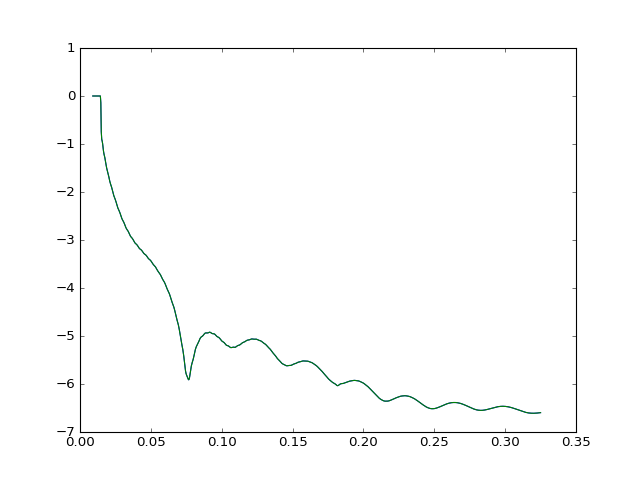

In [3]:
plt.figure(0)
plt.plot(igor_q, ref, igor_q, igor_r)

<IPython.core.display.Javascript object>


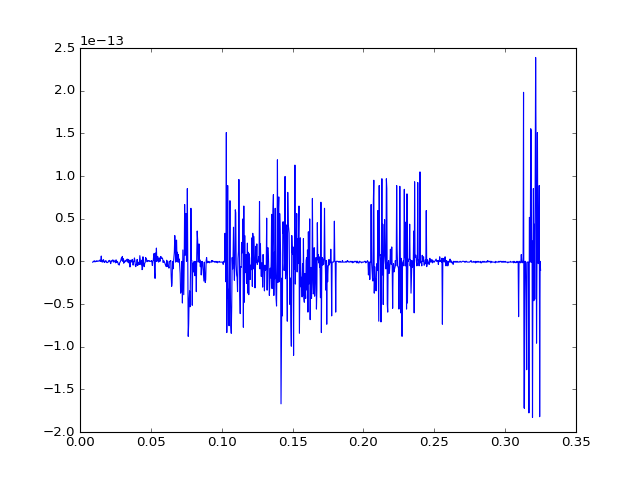

In [4]:
plt.figure(1)
plt.plot(igor_q, ref - igor_r)

In [5]:
brush.parameter_names()

['scale',
 'bkg',
 'SLD_super',
 'SLD_sub',
 'thickness_SiO2',
 'SLD_SiO2',
 'roughness_SiO2',
 'roughness_backing',
 'phi_init',
 'tail_thickness',
 'roughness_tail2int',
 'thickness_1',
 'phi_1',
 'roughness_1',
 'thickness_2',
 'phi_2',
 'roughness_2',
 'thickness_3',
 'phi_3',
 'roughness_3']

In [6]:
igor_params = {'scale': 1, 'bkg': 1e-7, 'SLD_super': 2.07,
                   'SLD_sub': 6.36, 'thickness_SiO2': 8.8,
                   'SLD_SiO2': 3.47, 'roughness_SiO2': 3.5,
                   'roughness_backing': 10, 'phi_init': 0.1,
                   'thickness_tail': 1000, 'roughness_tail2int': 4,
                   'thickness_1': 28, 'phi_1': 0.95, 'roughness_1': 2,
                   'thickness_2': 50, 'phi_2': 0.85, 'roughness_2': 2,
                   'thickness_3': 100, 'phi_3': 0.2, 'roughness_3': 20}

In [7]:
igor_params

{'SLD_SiO2': 3.47,
 'SLD_sub': 6.36,
 'SLD_super': 2.07,
 'bkg': 1e-07,
 'phi_1': 0.95,
 'phi_2': 0.85,
 'phi_3': 0.2,
 'phi_init': 0.1,
 'roughness_1': 2,
 'roughness_2': 2,
 'roughness_3': 20,
 'roughness_SiO2': 3.5,
 'roughness_backing': 10,
 'roughness_tail2int': 4,
 'scale': 1,
 'thickness_1': 28,
 'thickness_2': 50,
 'thickness_3': 100,
 'thickness_SiO2': 8.8,
 'thickness_tail': 1000}

In [9]:
for name,val in igor_params:
    print(name)

ValueError: too many values to unpack (expected 2)